### Notebook to prepare the full dataset used for training of different models, combining different code throughout this repo


In [95]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [96]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

Approximate resolution at NSIDE 256 is 0.23 deg
Approximate resolution at NSIDE 256 is 0.052 deg


# South

In [97]:
df_s = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


In [98]:
print(df_s.shape)
duplicates_removed = df_s.drop_duplicates()

print(duplicates_removed.shape)

(89107555, 6)
(89103806, 6)


In [99]:
df_south = duplicates_removed

print(len(df_south.BrickID.unique()))

248966


In [100]:
print(df_south.isna().sum())

BrickID         0
RA         146878
DEC        146878
LRG             0
ELG             0
QSO             0
dtype: int64


In [101]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_south = df_south.dropna(axis=0, inplace=False, how='any')

print(len(df_south.BrickID.unique()))
print(len(df_south))

242948
88956928


In [102]:
df_south.head()

BrickID          RA       DEC  LRG  ELG  QSO
0   387694  350.870568  9.868695    1    0    0
1   387694  350.871680  9.637755    0    1    0
2   387694  350.872142  9.694869    0    0    1
3   387694  350.872631  9.724626    0    0    1
4   387694  350.873243  9.683394    0    1    0

### Removing the Large Magellanic Cloud at Area
Large Magellanic Cloud (Ra 52:100 and DEC -70 to -50 respectively)

In [103]:
df_magellanic = df_south[(df_south['RA'] <=100) & (df_south['RA'] >=52) & (df_south['DEC'] <= -50) & (df_south['DEC'] >= -70)]

### 2. Get Galaxy Count per Healpy Pixel

In [104]:
# Magellanic
ra_magellanic = df_magellanic["RA"].to_numpy(copy=True)
dec_magellanic = df_magellanic["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_magellanic, dec_magellanic)

print("Number of LRGs in Sample:", len(ra_magellanic))

magellanic_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(magellanic_pixel_indices, return_counts=True)

print(unique)

mean_magellanic = counts.mean()
print("Mean LRGs per Pixel:", mean_magellanic)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_magellanic = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_magellanic.pixel_id = df_magellanic.pixel_id.astype(int)
df_magellanic.head()




Number of LRGs in Sample: 2641429
[693676 693677 693678 ... 758428 758429 758430]
Mean LRGs per Pixel: 359.08496465470364


pixel_id  lrg
0    693676   42
1    693677   36
2    693678   29
3    693679   34
4    693680   41

In [105]:
# LRG

df_LRG = df_south[df_south["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

Number of LRGs in Sample: 9688822
[163021 163022 163023 ... 757955 758427 758428]
Mean LRGs per Pixel: 33.539958597866196


pixel_id  lrg
0    163021    3
1    163022    1
2    163023    5
3    163024    3
4    164044    3

In [106]:
# elg

df_ELG = df_south[df_south["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

Number of ELGs in Sample: 36977945
[163021 163022 163023 ... 758428 758429 758430]
Mean ELGs per Pixel: 127.80366289478596
[[163021     14]
 [163022     17]
 [163023     20]
 ...
 [758428     12]
 [758429      4]
 [758430      6]]
   pixel_id  elg
0    163021   14
1    163022   17
2    163023   20
3    163024   23
4    163025    8


In [107]:
df_QSO = df_south[df_south["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())

Number of QSOs in Sample: 46639681
[163021 163022 163023 ... 758428 758429 758430]
Mean QSOs per Pixel: 161.19278291013026
[[163021     18]
 [163022     18]
 [163023     23]
 ...
 [758428      6]
 [758429      6]
 [758430      4]]
   pixel_id  qso
0    163021   18
1    163022   18
2    163023   23
3    163024   23
4    163025   11


In [108]:
df_south = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_qso, how='outer', on='pixel_id')
print(df_south.isna().sum())
print(df_lrg.shape, df_elg.shape, df_qso.shape, df_south.shape)

pixel_id      0
lrg         590
elg         130
qso         123
dtype: int64
(288874, 2) (289334, 2) (289341, 2) (289464, 4)


In [109]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df_south.dropna(axis=0, inplace=True)
print(df_south.isna().sum())
print(df_south.shape)

pixel_id    0
lrg         0
elg         0
qso         0
dtype: int64
(288816, 4)


In [110]:
print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_magellanic.pixel_id)))
print(len(intersection))
df_south = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south))


288816
7338
281478


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


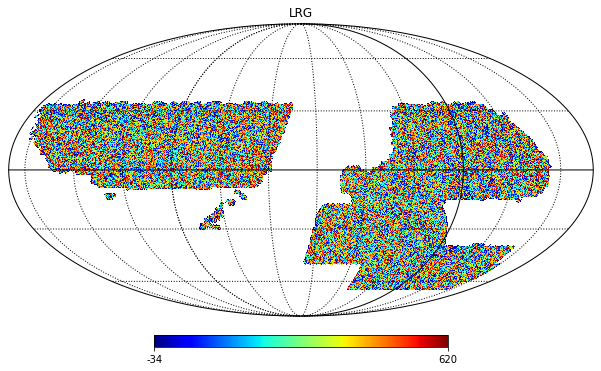

In [111]:
m_LRG = np.zeros(NPIX)

m_LRG[df_south.pixel_id.to_numpy()] = df_south.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


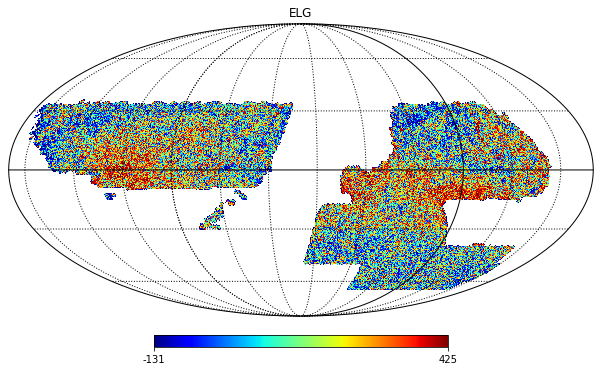

In [112]:
m_ELG = np.zeros(NPIX)

m_ELG[df_south.pixel_id.to_numpy()] = df_south.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


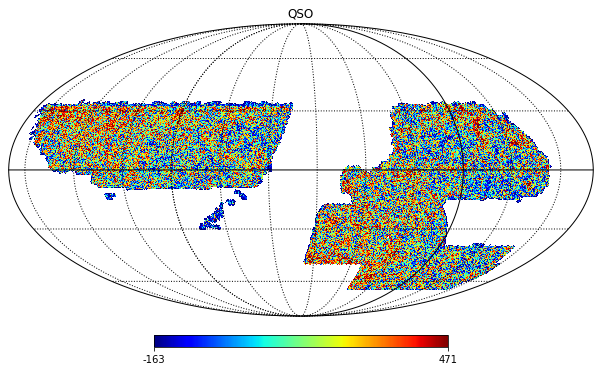

In [113]:
m_QSO = np.zeros(NPIX)

m_QSO[df_south.pixel_id.to_numpy()] = df_south.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [114]:
# Getting Exposure Densities across pixels

with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [115]:
df_south = df_south.astype(int)
df_south.head()



pixel_id  lrg  elg  qso
0    163021    3   14   18
1    163022    1   17   18
2    163023    5   20   23
3    163024    3   23   23
4    164044    3   48   47

In [116]:
pix_ids = df_south.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])

print(exp_len)

df_south['exposures'] = exp_len

df_south.head()

[163021 163022 163023 ... 752369 752370 752371]
[43. 47. 43. ... 31. 28. 35.]


pixel_id  lrg  elg  qso  exposures
0    163021    3   14   18       43.0
1    163022    1   17   18       47.0
2    163023    5   20   23       43.0
3    163024    3   23   23       49.0
4    164044    3   48   47       51.0

In [117]:
df_south = df_south.astype(int)

print(len(df_south[df_south.exposures < 7]))

367


0.0 180.0 -180.0 180.0


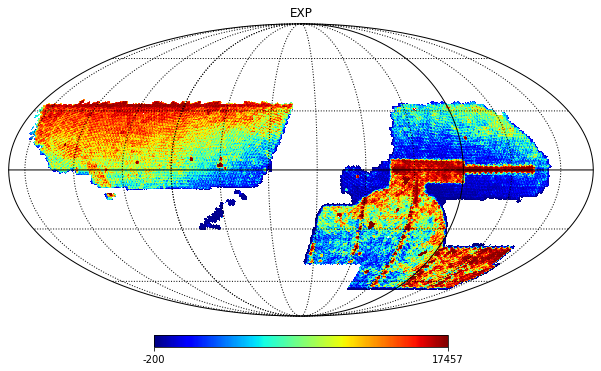

In [24]:
m_EXP = np.zeros(NPIX)

m_EXP[df_south.pixel_id.to_numpy()] = df_south.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [25]:
df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_south.csv')


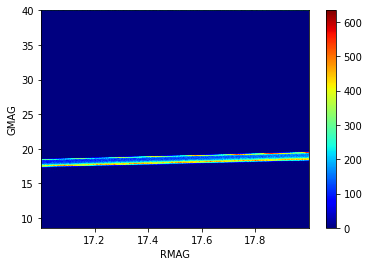

In [26]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [27]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(9603616, 5)


In [28]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [29]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(9349506, 7)


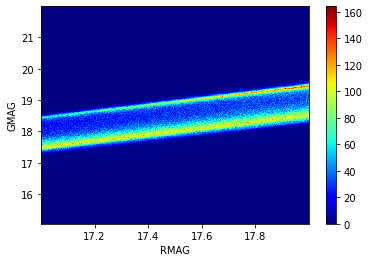

In [30]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [31]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


434    9382
506    9380
524    9377
593    9376
892    9374
       ... 
809    9324
594    9321
507    9320
435    9318
885    9313
Name: percent_RMAG, Length: 1000, dtype: int64

In [32]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [33]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(9349506, 12)

In [34]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [35]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [36]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(9349506, 12)
(9282180, 12)


(9245319, 12)

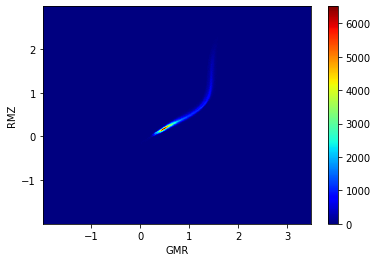

In [37]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [38]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())

Number of stellars in Sample: 9245319
[163021 163022 163023 ... 757955 758426 758427]
Mean stellars per Pixel: 31.99083387831792
[[163021      3]
 [163022      6]
 [163023      3]
 ...
 [757955      4]
 [758426      2]
 [758427      2]]
   pixel_id  stellar
0    163021        3
1    163022        6
2    163023        3
3    163024        2
4    163025        6
pixel_id    0
stellar     0
dtype: int64


In [39]:
df_south = df_south.merge(df_stellar, how='inner', on='pixel_id')
print(df_south.isna().sum())
df_south.shape

pixel_id     0
lrg          0
elg          0
qso          0
exposures    0
stellar      0
dtype: int64


(281309, 6)

In [40]:
df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar
0    163021    3   14   18         43        3
1    163022    1   17   18         47        6
2    163023    5   20   23         43        3
3    163024    3   23   23         49        2
4    164044    3   48   47         51       10

0.0 180.0 -180.0 180.0


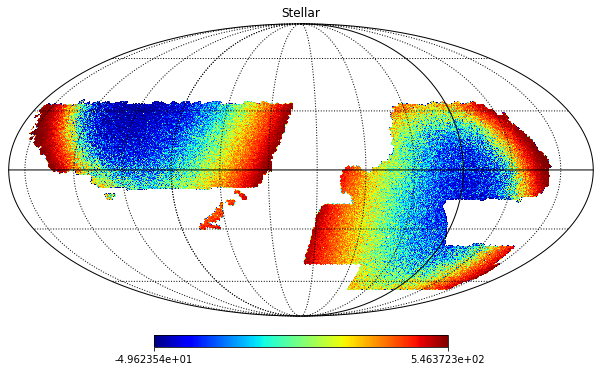

In [41]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_south.pixel_id.to_numpy()] = df_south.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [42]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [43]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [44]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_south["pixel_id"].to_numpy()
print(pixels_ids)
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

[163021 163022 163023 ... 752369 752370 752371]


In [45]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_south["EBV"] = ebv

In [46]:
df_south.EBV.describe()
df_south.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0    163021    3   14   18         43        3  0.018336
1    163022    1   17   18         47        6  0.016466
2    163023    5   20   23         43        3  0.016983
3    163024    3   23   23         49        2  0.013889
4    164044    3   48   47         51       10  0.019769

0.0 180.0 -180.0 180.0


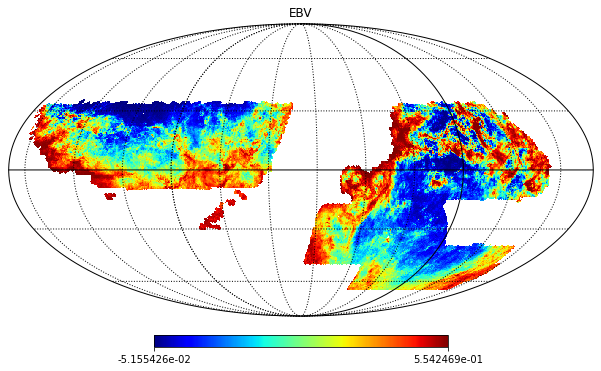

In [47]:
m_EBV = np.zeros(NPIX)

m_EBV[df_south.pixel_id.to_numpy()] = df_south.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [48]:
df_south.exposures = df_south.exposures.astype(int)
df_south.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0    163021    3   14   18         43        3  0.018336
1    163022    1   17   18         47        6  0.016466
2    163023    5   20   23         43        3  0.016983
3    163024    3   23   23         49        2  0.013889
4    164044    3   48   47         51       10  0.019769

In [49]:
with open('../../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'rb') as f:
    geo_dict = pickle.load(f)
    f.close()

print(len(geo_dict.keys()))

446042


In [50]:
sys_list = []
for key in geo_dict.keys():
    ind_sys_list = geo_dict[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_no = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [51]:
print(len((df_sys_geo_no)))

446042


In [52]:
df_south = df_south.merge(df_sys_geo_no, how='inner', on='pixel_id')
print(len(df_south))
print(len(df_south))

279873
279873


In [53]:
print(df_south.isna().sum())

pixel_id            0
lrg                 0
elg                 0
qso                 0
exposures           0
stellar             0
EBV                 0
airmass             0
ccdskysb_g         15
ccdskysb_r         29
ccdskysb_z          3
exptime_g           0
exptime_r           0
exptime_z           0
meansky_g           0
meansky_r           0
meansky_z           0
galdepth_g          0
galdepth_r          0
galdepth_z          0
seeing_g            0
seeing_r            0
seeing_z            0
psfdepth_g          0
psfdepth_r          0
psfdepth_z          0
psfnorm_mean_g      0
psfnorm_mean_r      0
psfnorm_mean_z      0
gausspsfdepth_g     0
gausspsfdepth_r     0
gausspsfdepth_z     0
pixel_covered       0
dtype: int64


In [54]:
df_south.dropna(axis=0, inplace=True)
print(df_south.isna().sum())

pixel_id           0
lrg                0
elg                0
qso                0
exposures          0
stellar            0
EBV                0
airmass            0
ccdskysb_g         0
ccdskysb_r         0
ccdskysb_z         0
exptime_g          0
exptime_r          0
exptime_z          0
meansky_g          0
meansky_r          0
meansky_z          0
galdepth_g         0
galdepth_r         0
galdepth_z         0
seeing_g           0
seeing_r           0
seeing_z           0
psfdepth_g         0
psfdepth_r         0
psfdepth_z         0
psfnorm_mean_g     0
psfnorm_mean_r     0
psfnorm_mean_z     0
gausspsfdepth_g    0
gausspsfdepth_r    0
gausspsfdepth_z    0
pixel_covered      0
dtype: int64


In [55]:
print(df_south.describe())

            pixel_id            lrg            elg            qso  \
count  279829.000000  279829.000000  279829.000000  279829.000000   
mean   410256.830804      33.672918     128.052754     160.831318   
std    161492.248357      13.129212      23.224999      28.367365   
min    163021.000000       1.000000       1.000000       1.000000   
25%    277667.000000      26.000000     114.000000     144.000000   
50%    382444.000000      32.000000     128.000000     160.000000   
75%    527001.000000      39.000000     142.000000     177.000000   
max    752370.000000     655.000000    2936.000000    1140.000000   

           exposures        stellar            EBV        airmass  \
count  279829.000000  279829.000000  279829.000000  279829.000000   
mean      119.120806      31.833466       0.044299       1.411118   
std       283.976686      27.801882       0.032859       0.256094   
min         6.000000       1.000000       0.000583       1.004748   
25%        64.000000      15.0000

In [56]:
cols = list(df_south.columns)
cols.remove('pixel_id')


In [57]:
df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar       EBV   airmass  \
0    163021    3   14   18         43        3  0.018336  1.075628   
1    163022    1   17   18         47        6  0.016466  1.066675   
2    163023    5   20   23         43        3  0.016983  1.099756   
3    163024    3   23   23         49        2  0.013889  1.141582   
4    164044    3   48   47         51       10  0.019769  1.102826   

   ccdskysb_g  ccdskysb_r  ...  psfdepth_g  psfdepth_r  psfdepth_z  \
0   23.387338   22.355397  ...   23.568120   22.986782   22.824048   
1   23.351178   22.468524  ...   23.608917   22.894046   22.702037   
2   23.351565   22.440314  ...   23.571177   22.948443   22.605821   
3   23.351568   22.439641  ...   23.584905   22.976249   22.611627   
4   23.404226   22.423180  ...   23.539988   23.062602   22.837433   

   psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  \
0        0.129023        0.170075        0.160323        23.708823   
1        0.132527        0.151160        0.131321        23.737227   
2        0.135617        0.149136        0.133771        23.754176   
3        0.136474        0.152069        0.128006        23.745989   
4        0.125407        0.171540        0.155293        23.676763   

   gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
0        23.194896        23.034398            1.0  
1        23.114644        22.908310            1.0  
2        23.141859        22.804123            1.0  
3        23.176429        22.803207            1.0  
4        23.244722        23.056524            1.0  

[5 rows x 33 columns]

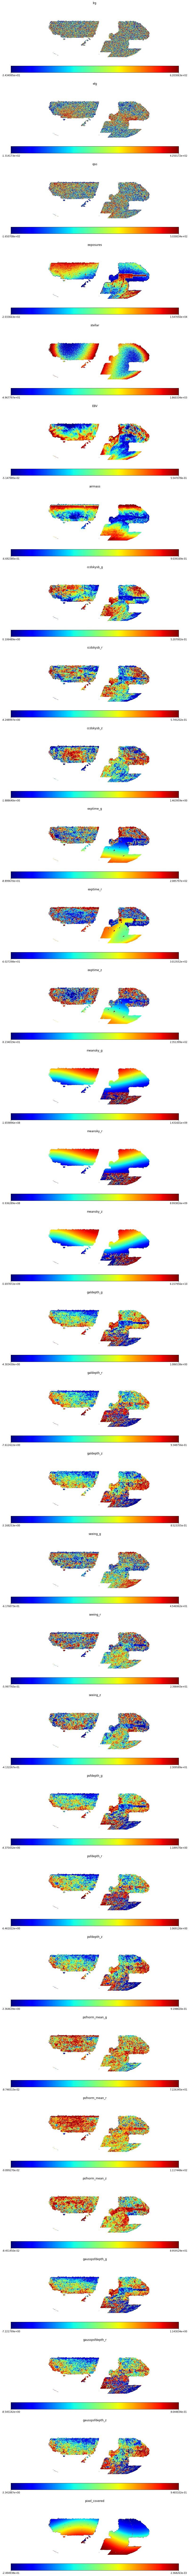

In [58]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south.pixel_id.to_numpy()] = df_south[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [59]:
df_south.describe()

pixel_id            lrg            elg            qso  \
count  279829.000000  279829.000000  279829.000000  279829.000000   
mean   410256.830804      33.672918     128.052754     160.831318   
std    161492.248357      13.129212      23.224999      28.367365   
min    163021.000000       1.000000       1.000000       1.000000   
25%    277667.000000      26.000000     114.000000     144.000000   
50%    382444.000000      32.000000     128.000000     160.000000   
75%    527001.000000      39.000000     142.000000     177.000000   
max    752370.000000     655.000000    2936.000000    1140.000000   

           exposures        stellar            EBV        airmass  \
count  279829.000000  279829.000000  279829.000000  279829.000000   
mean      119.120806      31.833466       0.044299       1.411118   
std       283.976686      27.801882       0.032859       0.256094   
min         6.000000       1.000000       0.000583       1.004748   
25%        64.000000      15.000000       0.022459       1.223758   
50%        77.000000      22.000000       0.035141       1.318859   
75%       163.000000      37.000000       0.055617       1.561969   
max     17612.000000    1906.000000       0.854514       2.385126   

          ccdskysb_g     ccdskysb_r  ...     psfdepth_g     psfdepth_r  \
count  279829.000000  279829.000000  ...  279829.000000  279829.000000   
mean       23.488990      22.583487  ...      23.980377      23.553551   
std         0.163337       0.193014  ...       0.304514       0.286331   
min        18.267529      18.225866  ...      18.533745      17.169754   
25%        23.408842      22.480732  ...      23.886297      23.453334   
50%        23.505015      22.599908  ...      24.050130      23.569916   
75%        23.589325      22.705892  ...      24.161008      23.696829   
max        24.377570      23.149384  ...      25.080976      24.621117   

          psfdepth_z  psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  \
count  279829.000000   279829.000000   279829.000000   279829.000000   
mean       22.535301        0.120273        0.138172        0.141387   
std         0.271118        0.200678        2.001997        0.193943   
min        14.272323        0.034474        0.043617        0.052015   
25%        22.451506        0.108481        0.121824        0.127096   
50%        22.583994        0.117538        0.132717        0.141010   
75%        22.696712        0.127312        0.142605        0.153139   
max        27.549091       72.386925     1044.366089       89.735524   

       gausspsfdepth_g  gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
count    279829.000000    279829.000000    279829.000000  279829.000000  
mean         24.158335        23.713376        22.718701       0.998543  
std           0.297909         0.296489         0.276698       0.013277  
min          17.070867        15.224684        14.403269       0.750000  
25%          24.067472        23.622099        22.636932       1.000000  
50%          24.221786        23.736710        22.766820       1.000000  
75%          24.329458        23.864185        22.882108       1.000000  
max          25.217281        24.576412        27.705493       1.000000  

[8 rows x 33 columns]

In [60]:


df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar       EBV   airmass  \
0    163021    3   14   18         43        3  0.018336  1.075628   
1    163022    1   17   18         47        6  0.016466  1.066675   
2    163023    5   20   23         43        3  0.016983  1.099756   
3    163024    3   23   23         49        2  0.013889  1.141582   
4    164044    3   48   47         51       10  0.019769  1.102826   

   ccdskysb_g  ccdskysb_r  ...  psfdepth_g  psfdepth_r  psfdepth_z  \
0   23.387338   22.355397  ...   23.568120   22.986782   22.824048   
1   23.351178   22.468524  ...   23.608917   22.894046   22.702037   
2   23.351565   22.440314  ...   23.571177   22.948443   22.605821   
3   23.351568   22.439641  ...   23.584905   22.976249   22.611627   
4   23.404226   22.423180  ...   23.539988   23.062602   22.837433   

   psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  \
0        0.129023        0.170075        0.160323        23.708823   
1        0.132527        0.151160        0.131321        23.737227   
2        0.135617        0.149136        0.133771        23.754176   
3        0.136474        0.152069        0.128006        23.745989   
4        0.125407        0.171540        0.155293        23.676763   

   gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
0        23.194896        23.034398            1.0  
1        23.114644        22.908310            1.0  
2        23.141859        22.804123            1.0  
3        23.176429        22.803207            1.0  
4        23.244722        23.056524            1.0  

[5 rows x 33 columns]

## Working on splitting the dataset south into south + DES mirroring the Chaussidon paper

### Splitting on Exposures



In [61]:

df_south['RA'], df_south['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_south.pixel_id.to_numpy(), lonlat=True)

df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar       EBV   airmass  \
0    163021    3   14   18         43        3  0.018336  1.075628   
1    163022    1   17   18         47        6  0.016466  1.066675   
2    163023    5   20   23         43        3  0.016983  1.099756   
3    163024    3   23   23         49        2  0.013889  1.141582   
4    164044    3   48   47         51       10  0.019769  1.102826   

   ccdskysb_g  ccdskysb_r  ...  psfdepth_z  psfnorm_mean_g  psfnorm_mean_r  \
0   23.387338   22.355397  ...   22.824048        0.129023        0.170075   
1   23.351178   22.468524  ...   22.702037        0.132527        0.151160   
2   23.351565   22.440314  ...   22.605821        0.135617        0.149136   
3   23.351568   22.439641  ...   22.611627        0.136474        0.152069   
4   23.404226   22.423180  ...   22.837433        0.125407        0.171540   

   psfnorm_mean_z  gausspsfdepth_g  gausspsfdepth_r  gausspsfdepth_z  \
0        0.160323        23.708823        23.194896        23.034398   
1        0.131321        23.737227        23.114644        22.908310   
2        0.133771        23.754176        23.141859        22.804123   
3        0.128006        23.745989        23.176429        22.803207   
4        0.155293        23.676763        23.244722        23.056524   

   pixel_covered          RA        DEC  
0            1.0  252.070312  35.869248  
1            1.0  252.421875  35.869248  
2            1.0  252.773438  35.869248  
3            1.0  253.125000  35.869248  
4            1.0  251.894531  35.685335  

[5 rows x 35 columns]

In [62]:
df_des = df_south[(df_south.RA < 105) | (df_south.RA > 300)]
df_des = df_des[(df_des.DEC < 10)]

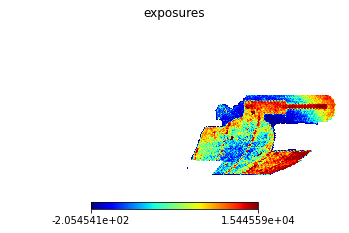

In [63]:
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [64]:
cut = 120
df_des = df_des[df_des.exposures > cut]
df_des_low = df_des[df_des.exposures <= 300]
df_des_high = df_des[df_des.exposures > 300]

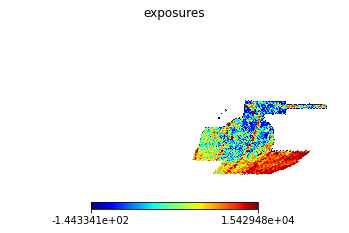

In [65]:
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [66]:
print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_des.pixel_id)))
print(len(intersection))
df_south_comp = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south_comp))
#df_non_des = df_south[df_south.exposures <= cut]

279829
89588
190241


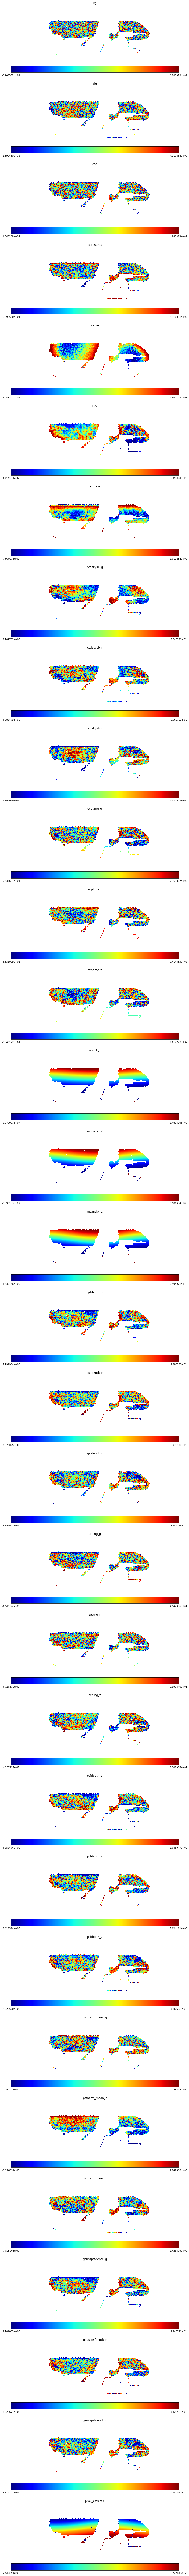

In [67]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south_comp.pixel_id.to_numpy()] = df_south_comp[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()


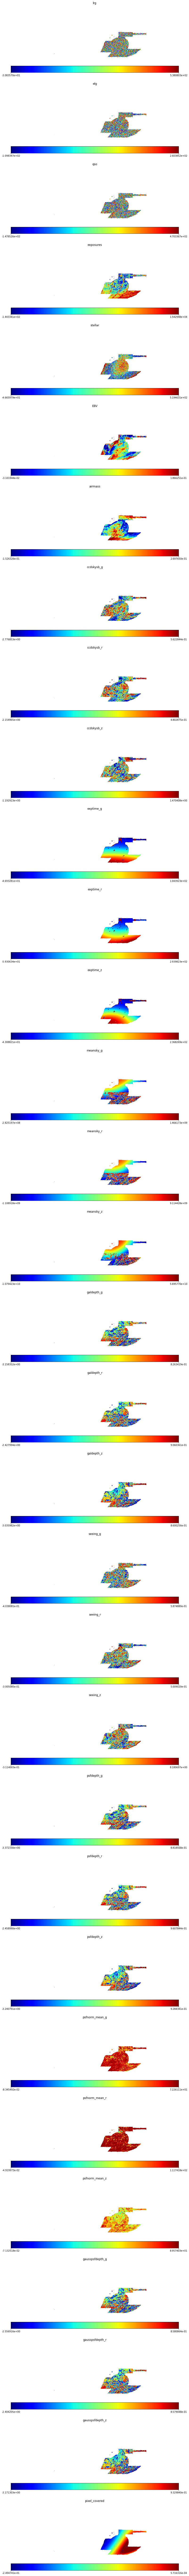

In [68]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_des.pixel_id.to_numpy()] = df_des[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

### South


In [69]:
col = list(df_south_comp.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'galdepth_g', 'galdepth_r', 'galdepth_z', 'seeing_g', 'seeing_r', 'seeing_z', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z', 'psfnorm_mean_g', 'psfnorm_mean_r', 'psfnorm_mean_z', 'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z', 'pixel_covered', 'RA', 'DEC']


In [70]:
df_no_outlier = df_south_comp.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z', 'pixel_covered']


In [71]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_south_comp)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_south_comp) - len(df_no_outlier)}")

190241
Element:  pixel_id | No of Elems with Z higher than factor  :  0
Element:  lrg | No of Elems with Z higher than factor  :  385
Element:  elg | No of Elems with Z higher than factor  :  24
Element:  qso | No of Elems with Z higher than factor  :  13
Element:  exposures | No of Elems with Z higher than factor  :  221
Element:  stellar | No of Elems with Z higher than factor  :  15
Element:  EBV | No of Elems with Z higher than factor  :  189
Element:  airmass | No of Elems with Z higher than factor  :  0
Element:  ccdskysb_g | No of Elems with Z higher than factor  :  353
Element:  ccdskysb_r | No of Elems with Z higher than factor  :  336
Element:  ccdskysb_z | No of Elems with Z higher than factor  :  1
Element:  exptime_g | No of Elems with Z higher than factor  :  0
Element:  exptime_r | No of Elems with Z higher than factor  :  119
Element:  exptime_z | No of Elems with Z higher than factor  :  0
Element:  meansky_g | No of Elems with Z higher than factor  :  596
Element:  me

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [72]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())

(185827, 22)
199
69.24008351854144
68.0


106
0


(array([2.8510e+03, 5.0910e+03, 6.8275e+04, 8.3818e+04, 2.0827e+04,
        4.3980e+03, 4.2800e+02, 7.3000e+01, 4.6000e+01, 2.0000e+01]),
 array([  8. ,  27.1,  46.2,  65.3,  84.4, 103.5, 122.6, 141.7, 160.8,
        179.9, 199. ]),
 <BarContainer object of 10 artists>)

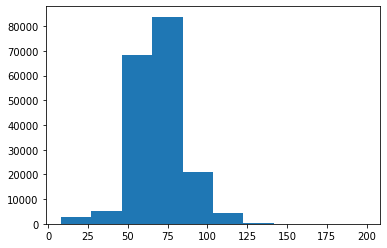

In [73]:
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))
print(len(df_no_outlier[df_no_outlier.exposures < 7]))




plt.hist(df_no_outlier.exposures)

In [74]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

(185718, 22)


### Scaling the Data

In [75]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')


cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
"""
df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()
"""

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z']


pixel_id            lrg            elg            qso  \
count  185718.000000  185718.000000  185718.000000  185718.000000   
mean   321532.286429      33.912432     130.100653     158.717895   
std     94179.481706      11.788913      23.167412      27.962106   
min    163021.000000       1.000000       1.000000       1.000000   
25%    243943.250000      26.000000     116.000000     142.000000   
50%    313420.500000      33.000000     130.000000     158.000000   
75%    392387.750000      40.000000     144.750000     175.000000   
max    752370.000000     129.000000     299.000000     357.000000   

           exposures        stellar            EBV        airmass  \
count  185718.000000  185718.000000  185718.000000  185718.000000   
mean        0.433919       0.143748       0.161696       0.374246   
std         0.110881       0.127702       0.119318       0.188476   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.368794       0.063025       0.079148       0.226741   
50%         0.425532       0.096639       0.128792       0.337617   
75%         0.496454       0.172269       0.207810       0.505633   
max         1.000000       1.000000       1.000000       1.000000   

          ccdskysb_g     ccdskysb_r     ccdskysb_z      exptime_g  \
count  185718.000000  185718.000000  185718.000000  185718.000000   
mean        0.547224       0.694035       0.643160       0.325805   
std         0.064978       0.088536       0.094683       0.121348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.507142       0.641468       0.585273       0.237205   
50%         0.551304       0.697909       0.652109       0.320210   
75%         0.592192       0.753200       0.709941       0.407480   
max         1.000000       1.000000       1.000000       1.000000   

           exptime_r      exptime_z     meansky_g     meansky_r     meansky_z  \
count  185718.000000  185718.000000  1.857180e+05  1.857180e+05  1.857180e+05   
mean        0.278425       0.458995  8.789222e-05  1.058164e-05  5.161254e-04   
std         0.104796       0.138226  8.536412e-03  3.224081e-03  1.831588e-02   
min         0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%         0.202559       0.347827  2.379288e-10  2.247254e-10  1.596358e-10   
50%         0.266193       0.443925  2.980959e-10  2.974140e-10  2.123859e-10   
75%         0.339171       0.546502  3.565072e-10  3.877114e-10  2.768511e-10   
max         1.000000       1.000000  1.000000e+00  1.000000e+00  1.000000e+00   

            seeing_g       seeing_r       seeing_z  
count  185718.000000  185718.000000  185718.000000  
mean        0.367219       0.321371       0.364036  
std         0.095388       0.087316       0.107910  
min         0.000000       0.000000       0.000000  
25%         0.299614       0.261015       0.291091  
50%         0.362462       0.314267       0.358338  
75%         0.428467       0.374805       0.432690  
max         1.000000       1.000000       1.000000

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


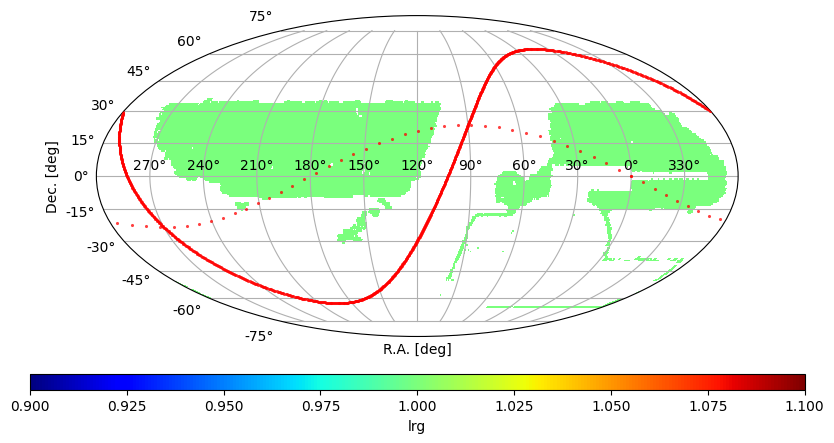

In [76]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='jet',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


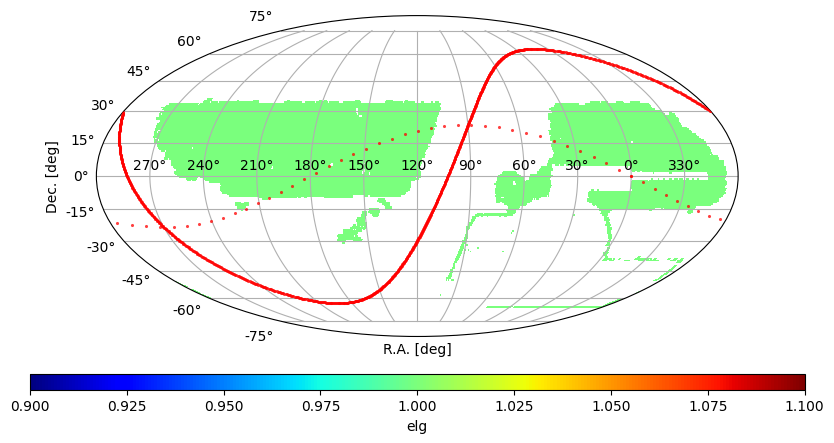

In [77]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='jet',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


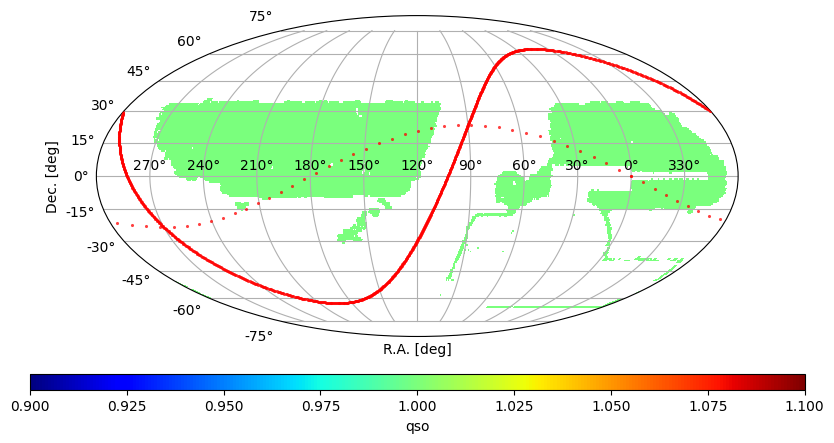

In [78]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='jet',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

In [79]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


        pixel_id  lrg  elg  qso  exposures   stellar       EBV   airmass  \
47629     244761   37  115  142   0.453901  0.037815  0.061904  0.488604   
57624     259578   47  115  158   0.411348  0.092437  0.271888  0.459988   
38758     231471   24  142  168   0.425532  0.046218  0.048371  0.568159   
159720    410618   31  120  150   0.411348  0.042017  0.037015  0.092151   
116420    347253   35  145  190   0.375887  0.100840  0.094634  0.354559   

        ccdskysb_g  ccdskysb_r  ccdskysb_z  exptime_g  exptime_r  exptime_z  \
47629     0.545004    0.605919    0.580485   0.408136   0.389434   0.470199   
57624     0.599335    0.769056    0.770508   0.397638   0.208198   0.285201   
38758     0.588837    0.794688    0.585928   0.177165   0.138120   0.403974   
159720    0.561002    0.709089    0.786002   0.145669   0.351979   0.431328   
116420    0.485458    0.746081    0.809895   0.582677   0.263777   0.349986   

           meansky_g     meansky_r     meansky_z  seeing_g  seeing_r

In [80]:
df_train.to_csv('../../bricks_data/south.csv', index=False)
df_test.to_csv('../../bricks_data/south_test.csv', index=False)



### DES

In [81]:
col = list(df_des.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'galdepth_g', 'galdepth_r', 'galdepth_z', 'seeing_g', 'seeing_r', 'seeing_z', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z', 'psfnorm_mean_g', 'psfnorm_mean_r', 'psfnorm_mean_z', 'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z', 'pixel_covered', 'RA', 'DEC']


In [82]:
df_no_outlier = df_des.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z', 'pixel_covered']


In [83]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_des)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_des) - len(df_no_outlier)}")

89588
Element:  pixel_id | No of Elems with Z higher than factor  :  0
Element:  lrg | No of Elems with Z higher than factor  :  89
Element:  elg | No of Elems with Z higher than factor  :  17
Element:  qso | No of Elems with Z higher than factor  :  5
Element:  exposures | No of Elems with Z higher than factor  :  335
Element:  stellar | No of Elems with Z higher than factor  :  5
Element:  EBV | No of Elems with Z higher than factor  :  79
Element:  airmass | No of Elems with Z higher than factor  :  0
Element:  ccdskysb_g | No of Elems with Z higher than factor  :  223
Element:  ccdskysb_r | No of Elems with Z higher than factor  :  26
Element:  ccdskysb_z | No of Elems with Z higher than factor  :  20
Element:  exptime_g | No of Elems with Z higher than factor  :  301
Element:  exptime_r | No of Elems with Z higher than factor  :  676
Element:  exptime_z | No of Elems with Z higher than factor  :  446
Element:  meansky_g | No of Elems with Z higher than factor  :  14
Element:  mean

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

(87086, 22)
3507
192.66943021840478
183.0


(array([8.694e+04, 3.500e+01, 9.000e+00, 4.700e+01, 1.000e+00, 2.000e+01,
        1.000e+01, 1.400e+01, 9.000e+00, 1.000e+00]),
 array([ 121. ,  459.6,  798.2, 1136.8, 1475.4, 1814. , 2152.6, 2491.2,
        2829.8, 3168.4, 3507. ]),
 <BarContainer object of 10 artists>)

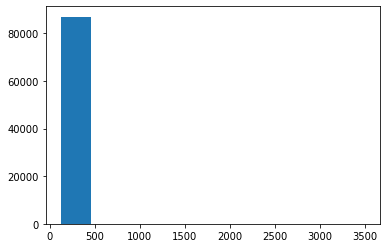

In [84]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
plt.hist(df_no_outlier.exposures)

450
0


(array([8.694e+04, 3.500e+01, 9.000e+00, 4.700e+01, 1.000e+00, 2.000e+01,
        1.000e+01, 1.400e+01, 9.000e+00, 1.000e+00]),
 array([ 121. ,  459.6,  798.2, 1136.8, 1475.4, 1814. , 2152.6, 2491.2,
        2829.8, 3168.4, 3507. ]),
 <BarContainer object of 10 artists>)

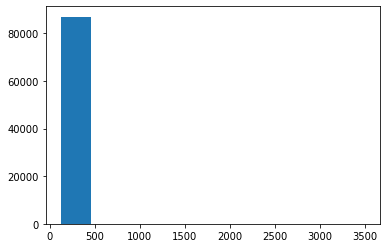

In [85]:
print(len(df_no_outlier[df_no_outlier.exposures > 350]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))



plt.hist(df_no_outlier.exposures)

In [86]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 350]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

(86631, 22)


### Scaling the Data

In [87]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')


cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')

"""
df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()"""


df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z']


pixel_id           lrg           elg           qso     exposures  \
count   86631.000000  86631.000000  86631.000000  86631.000000  86631.000000   
mean   594907.714109     32.629174    124.280696    166.087682      0.301215   
std    107645.452380     10.226260     18.438227     24.626504      0.155705   
min    346500.000000      1.000000      8.000000     17.000000      0.000000   
25%    524836.500000     26.000000    112.000000    149.000000      0.192982   
50%    618163.000000     31.000000    124.000000    165.000000      0.271930   
75%    681940.500000     38.000000    136.000000    181.000000      0.377193   
max    751316.000000    109.000000    251.000000    334.000000      1.000000   

            stellar           EBV       airmass    ccdskysb_g    ccdskysb_r  \
count  86631.000000  86631.000000  86631.000000  86631.000000  86631.000000   
mean       0.180518      0.182499      0.430126      0.692276      0.705142   
std        0.127480      0.116634      0.147621      0.085004      0.097423   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.100775      0.101975      0.326047      0.642745      0.644455   
50%        0.139535      0.148103      0.463268      0.706344      0.717684   
75%        0.217054      0.229307      0.542174      0.753986      0.771646   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         ccdskysb_z     exptime_g     exptime_r     exptime_z     meansky_g  \
count  86631.000000  86631.000000  86631.000000  86631.000000  8.663100e+04   
mean       0.489002      0.498462      0.496499      0.506293  9.246731e-02   
std        0.070981      0.034330      0.039997      0.051010  1.410212e-01   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.444472      0.495740      0.498190      0.499530  3.658909e-11   
50%        0.491584      0.495740      0.498190      0.499530  1.097554e-10   
75%        0.536635      0.495740      0.498190      0.499530  1.633800e-01   
max        1.000000      1.000000      1.000000      1.000000  1.000000e+00   

          meansky_r     meansky_z      seeing_g      seeing_r      seeing_z  
count  8.663100e+04  8.663100e+04  86631.000000  86631.000000  86631.000000  
mean   9.322272e-02  7.653594e-02      0.387225      0.383445      0.433639  
std    1.424204e-01  1.384129e-01      0.092357      0.091047      0.120850  
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000  
25%    2.266867e-11  2.602904e-11      0.320609      0.323095      0.348272  
50%    1.262044e-10  4.217608e-11      0.381611      0.383318      0.430246  
75%    1.582558e-01  1.008844e-01      0.447689      0.442489      0.516726  
max    1.000000e+00  1.000000e+00      1.000000      1.000000      1.000000

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


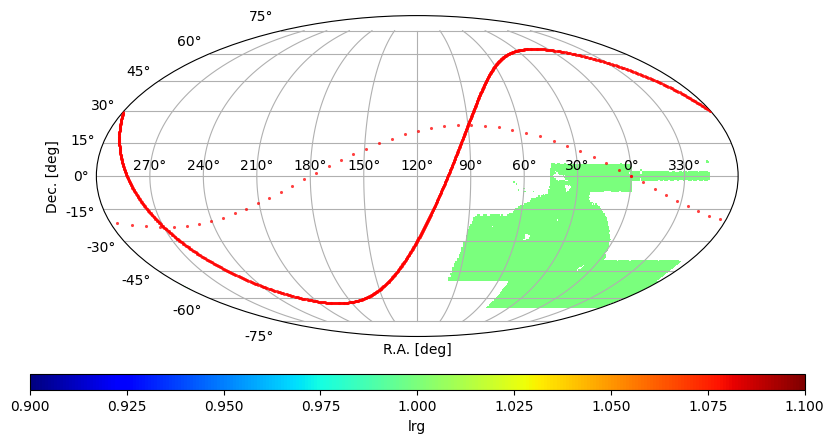

In [88]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='jet',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


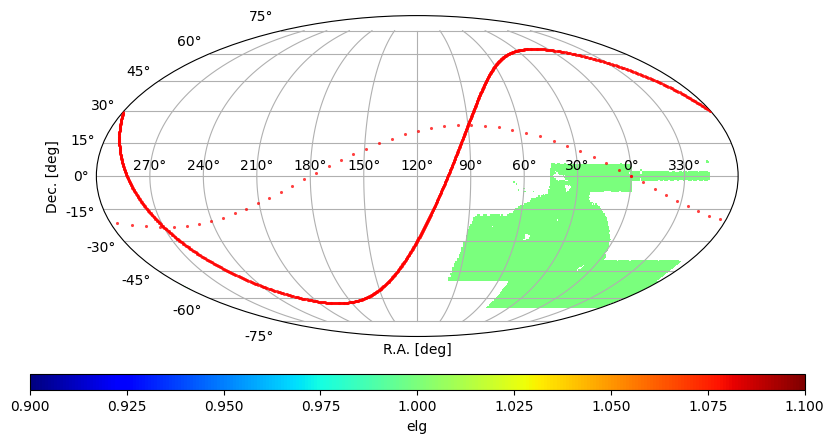

In [89]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='jet',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


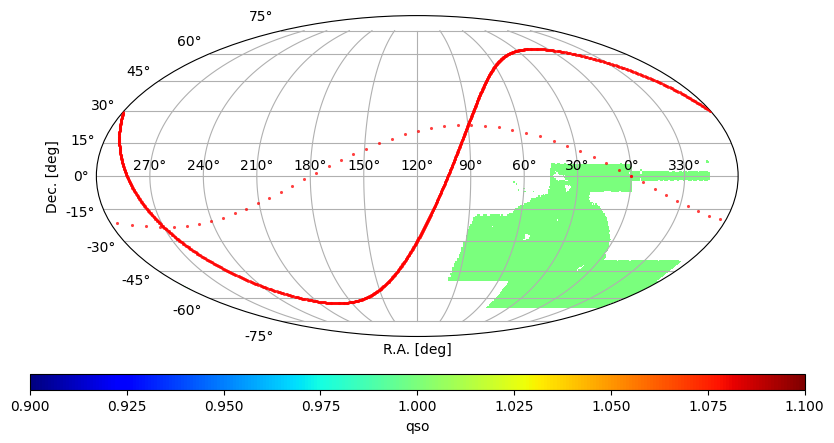

In [90]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='jet',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


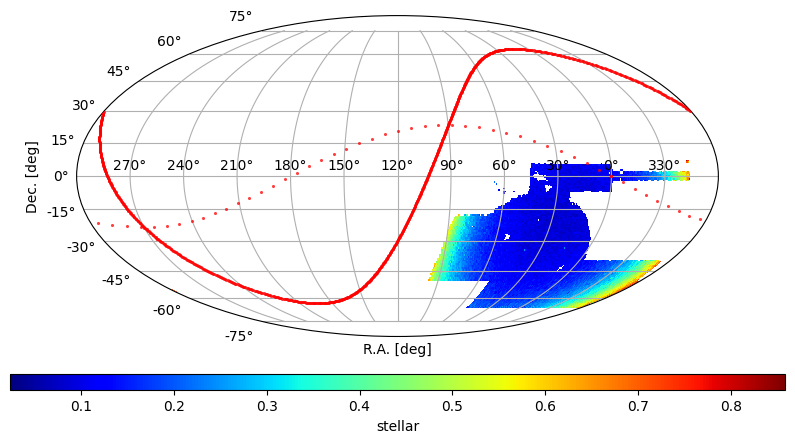

In [91]:
ax = plot_sky_binned(ra,dec,data=df_scaled.stellar ,cmap='jet',label='stellar', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


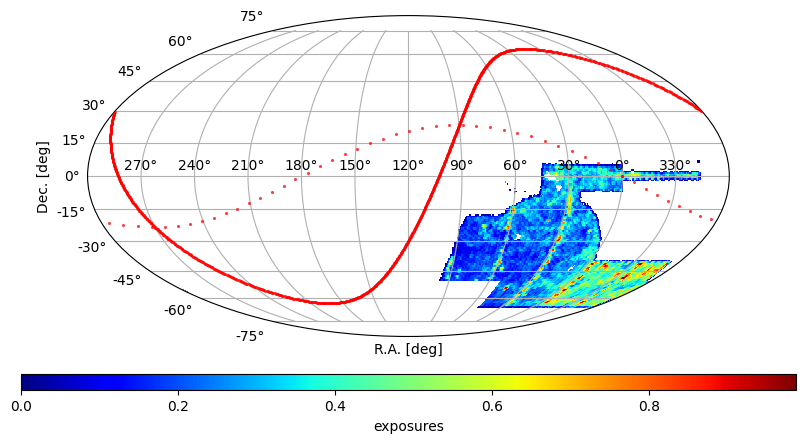

In [92]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exposures ,cmap='jet',label='exposures', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [93]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


        pixel_id  lrg  elg  qso  exposures   stellar       EBV   airmass  \
256663    681935   44  121  138   0.723684  0.294574  0.105954  0.187047   
276639    741640   18   99  145   0.447368  0.596899  0.316235  0.452655   
265084    704406   36  144  150   0.197368  0.193798  0.081118  0.247530   
230445    605943   32  137  173   0.096491  0.403101  0.227632  0.451624   
266700    709307   18  102  151   0.333333  0.124031  0.079361  0.366231   

        ccdskysb_g  ccdskysb_r  ccdskysb_z  exptime_g  exptime_r  exptime_z  \
256663    0.396602    0.521054    0.427811    0.49574    0.49819    0.49953   
276639    0.642595    0.494973    0.337905    0.49574    0.49819    0.49953   
265084    0.778865    0.699671    0.467063    0.49574    0.49819    0.49953   
230445    0.726829    0.694743    0.547590    0.49574    0.49819    0.49953   
266700    0.720459    0.676198    0.510960    0.49574    0.49819    0.49953   

           meansky_g  meansky_r     meansky_z  seeing_g  seeing_r  s

In [94]:
df_train.to_csv('../../bricks_data/des.csv', index=False)
df_test.to_csv('../../bricks_data/des_test.csv', index=False)



